In [71]:
from matplotlib import pyplot as plt

from scipy.fftpack import dct
from scipy.fftpack import idct
from scipy.interpolate import interp1d

from PIL import Image

import cv2
import numpy as np

In [72]:
img = cv2.imread('maudy.jpg',0)


In [123]:
def dct2(a):
    return dct(dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2(a):
    return idct(idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

<Figure size 432x288 with 0 Axes>

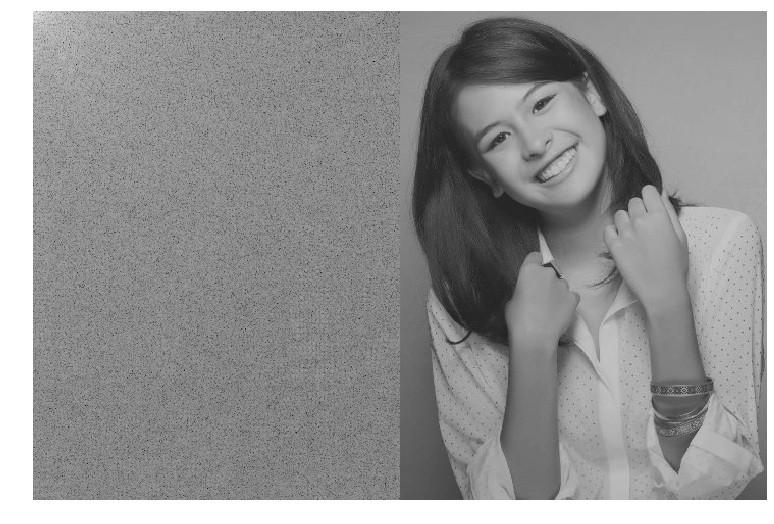

In [130]:
img_dct = dct2(img)
img_idct = idct2(img_dct)

# Calculate spectrum
magnitude_spectrum = 20*np.log(np.abs(img_dct)) + 128
ori_combine = np.concatenate((magnitude_spectrum, img_idct), axis=1)

# Showing
plt.figure()
plt.figure(figsize=(12 * 2, 9))
plt.axis('off')
plt.imshow(ori_combine, cmap = 'gray')
plt.show()

In [129]:
np.max(magnitude_spectrum)

220.423937469539

<Figure size 432x288 with 0 Axes>

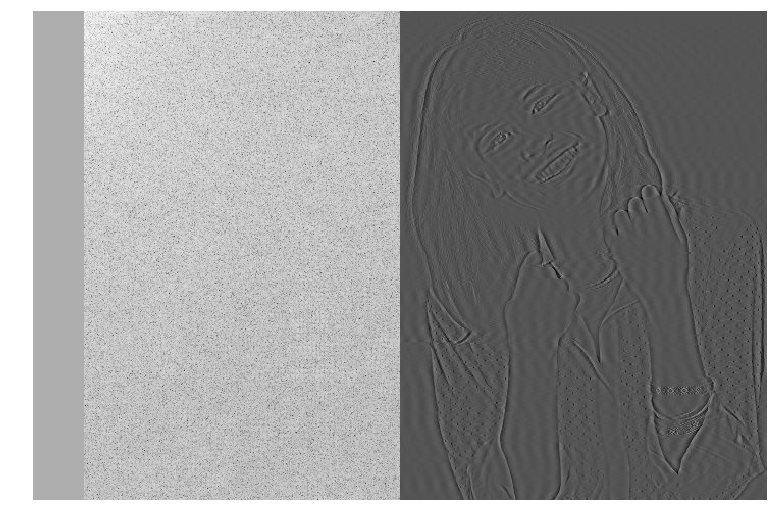

In [131]:
img_dct_lpf = img_dct.copy()

# Masking
img_dct_lpf[:,0:50] = 1

# Inverse Transform
img_idct_lpf = idct2(img_dct_lpf)

# Calculate spectrum
magnitude_spectrum_lpf = 20*np.log(np.abs(img_dct_lpf)) + 128
lpf_combine = np.concatenate((magnitude_spectrum_lpf, img_idct_lpf), axis=1)

# Showing
plt.figure()
plt.figure(figsize=(12 * 2, 9))
plt.axis('off')
plt.imshow(lpf_combine, cmap = 'gray')
plt.show()

<Figure size 432x288 with 0 Axes>

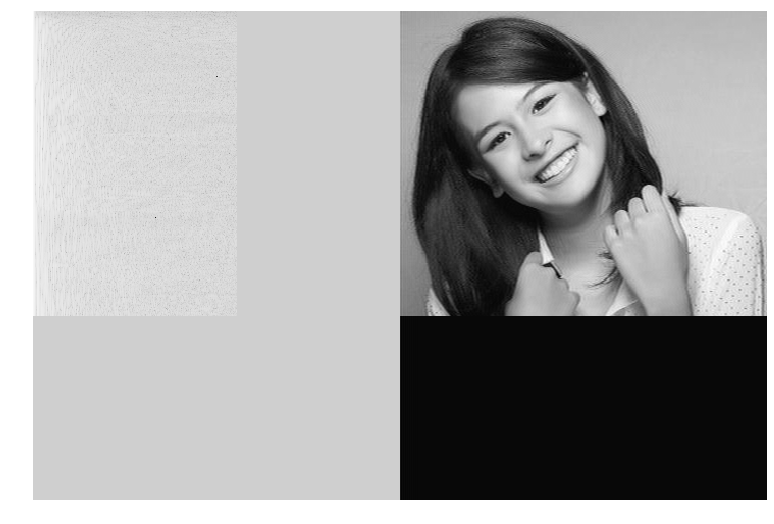

In [119]:
img_dct_hpf = img_dct.copy()
rows, cols = img_dct_hpf.shape

# Masking
img_dct_hpf[:,200:cols] = 1
img_dct_hpf[300:rows,:] = 1

# Inverse Transform
img_idct_hpf = idct(img_dct_hpf, norm='ortho')

# Calculate spectrum
magnitude_spectrum_hpf = 20*np.log(np.abs(img_dct_hpf))
magnitude_spectrum_hpf = norm(magnitude_spectrum_hpf, min_norm, max_norm)
hpf_combine = np.concatenate((magnitude_spectrum_hpf, img_idct_hpf), axis=1)

# Showing
plt.figure()
plt.figure(figsize=(12 * 2, 9))
plt.axis('off')
plt.imshow(hpf_combine, cmap = 'gray')
plt.show()

In [99]:
print(min_norm, max_norm)

-703.4879182352507 162.44796281959844


In [105]:
norm([min_norm], min_norm, max_norm)

array([0.])